<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT19/blob/tobzed/Lab-5/tedwards_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 5: ODEs**
**Tobias Edwards**
17th of February 2019


# **Abstract**

This lab focused on methods for approximating solutions to scalar and systems of initial value problem ODEs. We focused on various methods: classes of Runge-Kutta methods and predictor-corrector methods. For this week, I chose to implement the explicit Euler method. 

#**About the code**

In [0]:
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Code by Tobias Edwards (tedwards@kth.se)

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [0]:
# Load neccessary modules.
from google.colab import files
from math import *
import numpy as np
import unittest
from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

Given a differential equation of the form: $\frac{du}{dt}=\lambda*u$, $\lambda \in \{x \in R : x < 0\}$, and some intial value $u(t_0) = u_0$, we would like to approximate $u(T)$ where $T > t_0$. The explicit Euler method does this by first choosing a step length $h = \frac{T-t_0}{N}$ where $N$ is the number of steps. The method states that $U_{n+1} = U_n + h*f(U_n,t_n), U_0 = u_0$. This is derived from the definition of differentiation. Eulers method is expanded to work for systems of ODEs also.

For an equation of the form $\frac{du}{dt}=\lambda*u$, the general solution can be expressed as $ u(t) = e^{\lambda*t}+C$, $C$ a constant depending on the initial value. If $\lambda$ is positive, the solution $u(t) \rightarrow \infty$ as $t \rightarrow \infty$. Thus the approximation will also diverge. However, how stable is the Euler method for equations where $\lambda < 0$ ? While the exact solution will converge over time, can we be certain that our approximation will converge? From the defintion of Euler's method, we can derive the condition: $|1+h*\lambda| < 1$ which, if fulfilled, ensures that the method will converge over time. This condition tells us that we must choose a step size small enough that our solution does not diverge.  



# **Results**

For the following functions, input is T, the stopping time, f, the differential(s), u0, the initial value, and N, the number of steps.

### Assignment 1. Time stepping for scalar initial value problem du/dt = f(u,t)



In [0]:
def explicit_euler(T,f,u0,N):
    h = T/N
    u = np.zeros(N+1)
    u[0] = u0
    t = np.zeros(N+1)
    t[0] = 0
    for n in range(1,N+1):
        t[n] = t[n-1]+h
        u[n] = u[n-1] + h*f(u[n-1],t[n-1])
    return u,t,h

### Assignment 2. Time stepping for system of initial value problems du/dt = f(u,t)

In [0]:
def explicit_euler_system(T,f,u0,N):
    h = T/N
    u = np.zeros((u0.shape[0],N+1))
    u[:,0] = u0
    t = np.zeros(N+1)
    for n in range(1,N+1):
        t[n] = t[n-1]+h
        u[:,n] = u[:,n-1] + h*f(u[:,n-1],t[n-1])
    return u,t,h

# Tests

Convergence of scalar Explicit Euler
Step size: 1.5, Error: 12.249876590195914
Step size: 0.375, Error: 0.00012335019944190417
Step size: 0.09375, Error: 9.767674327451167e-05
Step size: 0.0234375, Error: 3.487073665366302e-05




Convergence of Explicit Euler for Systems
y1: Step size: 0.5, Error: 21.221587213240547
y2: Step size: 0.5, Error: 13.835536923187668
y1: Step size: 0.125, Error: 11.115625264607353
y2: Step size: 0.125, Error: 7.308751966732437
y1: Step size: 0.03125, Error: 3.7777751698301145
y2: Step size: 0.03125, Error: 2.490988980499502
y1: Step size: 0.0078125, Error: 1.0356318265730664
y2: Step size: 0.0078125, Error: 0.683392678534684


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


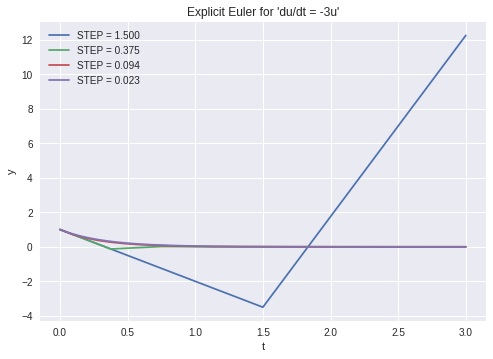

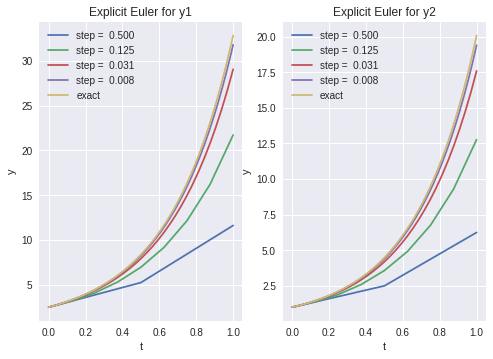

.
----------------------------------------------------------------------
Ran 1 test in 0.809s

OK


In [12]:
class Lab5FunctionsTest(unittest.TestCase):

    def tests(self):
        # pick an ODE of the form du/dt = a*u, a < 0
        #for explicit euler, solution is A-stable if |1+h*a| < 1
        f = lambda u_n,t: -3.0*u_n
        asol = lambda t: exp(-3.0*t)
        steps = [2,8,32,128]
        exact = asol(3.0)
        print("Convergence of scalar Explicit Euler")
        plt.figure(1)
        for s in steps:
            y,t,h = explicit_euler(3.0,f,1.0,s)
            print("Step size: " + str(h) + ", Error: " + str(abs(exact-y[-1])))
            plt.plot(t,y,label="STEP = %.3f" % (h))
        plt.legend()
        plt.title("Explicit Euler for 'du/dt = -3u'")
        plt.ylabel("y")
        plt.xlabel("t")


        print ("\n\n\n")
        print("Convergence of Explicit Euler for Systems")
        plt.figure(2)
        # SYSTEM OF ODEs
        A = np.array([[1.,3.],[0.,3.]])
        # exact solutions
        y1 = lambda t: exp(t) + 1.5*exp(3.0*t)
        y2 = lambda t: exp(3.0*t)

        f = lambda y,t: A.dot(y)
        steps = [2,8,32,128]
        end_steps = None;
        for s in steps:
            y,t,h = explicit_euler_system(1.,f,np.array([2.5,1.]),s)
            print ("y1: Step size: " + str(h) + ", Error: " + str(abs(y1(1.)-y[0,-1])))
            print ("y2: Step size: " + str(h) + ", Error: " + str(abs(y2(1.)-y[1,-1])))
            plt.subplot(121)
            plt.plot(t,y[0,:],label="step =  %.3f" % (h))
            plt.subplot(122)
            plt.plot(t,y[1,:],label="step =  %.3f" % (h))
            if s == steps[-1]:
                end_steps = t

        plt.subplot(121)
        plt.plot(t,[y1(x) for x in t],label="exact")
        plt.legend()
        plt.title("Explicit Euler for y1")
        plt.xlabel("t")
        plt.ylabel("y")
        plt.subplot(122)
        plt.plot(t,[y2(x) for x in t],label="exact")
        plt.legend()
        plt.title("Explicit Euler for y2")
        plt.xlabel("t")
        plt.ylabel("y")

        plt.show()
        
unittest.main(argv=['first-arg-is-ignored'], exit=False)

# **Discussion**

### Scalar ODE
For my test I choose $\frac{du}{dt}=-3u$. For the explicit Euler method, we have the condition that $|1-3h| < 1$ for convergence. This means that the method diverges for $h > \frac{2}{3}$, as $h$ is always greater than 0. We see from the plot, that the approximation diverges for $h=1.5$.  We can also observe how the method becomes more accurate as we half the step size.  

### Systems of ODEs
For this test I chose a matrix $A = \begin{bmatrix} 1 & 3 \\ 0 & 3\end{bmatrix}$, which has eigenvalues $\lambda_1 = 1$ and $\lambda_2 = 3$. Again, we can see how the method accuracy improves with smaller step sizes. As the exact solutions contain only positive terms, the solution will diverge to infinity over time.  